# Plot：好看最重要

本章会介绍如何绘制图形。绘图的内容非常多，可以单独写一本书。因此，

1. 本章重于对DataFrame格式的数据进行绘图。
2. 本章只进行一般性的介绍，更复杂例子会留在案例中。
  

## 简单示例

In [63]:
# 以下都是例行公事，直接拷贝即可

import pandas as pd
import numpy as np 

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt 

import seaborn as sns

sns.set() # 默认用seaborn的绘图样式

plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] #设置字体。如果不设置，中文会乱码。这里采用微软雅黑'Microsoft YaHei'，如果显示不正常，也可以使用黑体'SimHei'或者宋体'SimSun'等
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

从数据中简单绘制一个二维图形，如正弦曲线和余弦曲线。

1. 生成正弦和余弦曲线的数据
2. 利用`df.plot()`仿佛进行绘图
3. 利用`plt.xxx()`增加其他组件

生成数据：

In [64]:
x = np.arange(np.pi * 20)/10 # 
y = np.sin(x) # 对x序列中的每一个值求sin(*)
z = np.cos(x)

df = pd.DataFrame({'x':x,'sin(x)': y ,'cos(x)':z})
df.set_index('x',inplace=True)
df.head()

,sin(x),cos(x)
x,,
0.0,0.000000,1.000000
0.1,0.099833,0.995004
0.2,0.198669,0.980067
0.3,0.295520,0.955336
0.4,0.389418,0.921061


其中：

1. `index`（本案中为x）会成为横轴
2. 列标签会自动成为曲线的标签。

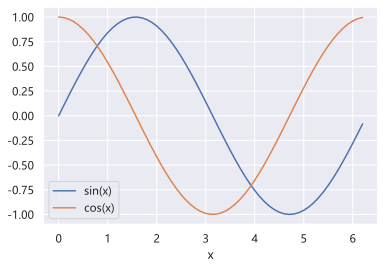

In [65]:
df.plot(); # 默认绘图！

`df.plot()`其他常用参数：

1. `figsize`：图尺寸，参数接受一个tuple，表示长和宽（英寸）
2. `style`：线的风格：颜色-形状-线型，比如'ro-'表示“红色+圆点+横线”

风格具体见[Matplotlib官网](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html)

绘图的其他组件：

1. `plt.xlabel()`：设置x轴标签
2. `plt.ylabel()`：设置y轴标签
3. `plt.title()`：设置标题
4. `plt.xlim()`和`plt.ylim`：绘制的x或者y的范围，参数接收一个tuple，表示起止点。


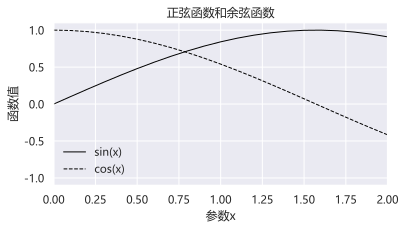

In [66]:
# 绘图本身可以保存到一个变量中
# 黑白风格，使用横线和虚线，便于打印
p = df.plot(figsize=(6,3), style=['-','--'], linewidth=1, c='black') 


# 设置一个图形中的其他组件
plt.xlabel('参数x')
plt.ylabel('函数值')
plt.title('正弦函数和余弦函数')
plt.xlim((0,2)) # 只绘制x从0到5的区间
plt.legend(frameon=False); # 去掉图例的方框


### 保存绘图

1. 直接点图形右侧的'save as'磁盘图标。
2. 用代码保存。


一般可以采用png格式，比如`sin_cos.png`。

对于位图格式（点阵）参数dpi设定每英寸点的数量：打印品质一般要求dpi为300以上

In [67]:
# p是前面plot()进行绘图所返回的对象，可以视为图形本身
# p.figure.savefig()函数进行保存。

p.figure.savefig('sin_cos_dpi100.png',dpi=100)
p.figure.savefig('sin_cos_dpi300.png',dpi=300)

也可以采用svg矢量格式，这个格式可以任意缩放都保持清晰，因此不用考虑dpi问题，但某些比较老的软件可能不认识svg格式。

In [68]:
p.figure.savefig('sin_cos.svg')

### 散点图

数据是作业03的财务数据。

In [69]:
df = pd.read_excel('data/sample_fin_data.xlsx',converters={'证券代码':str,'统计截止日期':pd.to_datetime})
df.head()


,证券代码,证券简称,统计截止日期,总资产,总负债,净资产,净利润,营业总收入,资产负债率
0,000001,平安银行,2016-12-31,2.953434e+12,2.751263e+12,2.021710e+11,2.259900e+10,1.044160e+11,0.9315
1,000001,平安银行,2017-12-31,3.248474e+12,3.026420e+12,2.220540e+11,2.318900e+10,1.048690e+11,0.9316
2,000001,平安银行,2018-12-31,3.418592e+12,3.178550e+12,2.400420e+11,2.481800e+10,1.062120e+11,0.9298
3,000001,平安银行,2019-12-31,3.939070e+12,3.626087e+12,3.129830e+11,2.819500e+10,1.268140e+11,0.9205
4,000001,平安银行,2020-12-31,4.468514e+12,4.104383e+12,3.641310e+11,2.892800e+10,1.432420e+11,0.9185


利用`.plot.scatter()`：绘制散点图。如：

我们想看一下，2020年年报中，所以股票的总资产和净利润之间的关系。

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


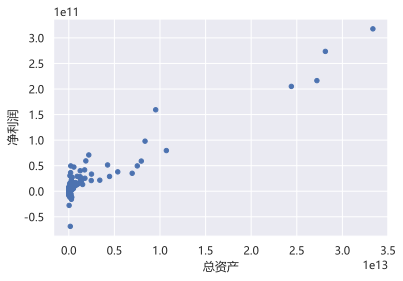

In [70]:
data = df.query("统计截止日期.dt.year == 2020")
data.plot.scatter(x = '总资产', y = '净利润');

`.plot.scatter()`的常用参数：

1. `c`：颜色。具体见[Matplotlib官网](https://matplotlib.org/stable/gallery/color/named_colors.html)
2. `s`：点的大小
3. `alpha`：透明度
4. `logx`和`logy`：x或者y坐标是否采用对数坐标


2个考虑：

1. 右偏分布（和钱有关的，例如总资产，多数如此），在图形上会聚集在数字小的区域（如上图），取对数会更容易体现变量的关系。
2. 散点图的点如果很多，可以考虑增加透明度，那么点集中的部分，颜色自然较深；反之自然较浅。

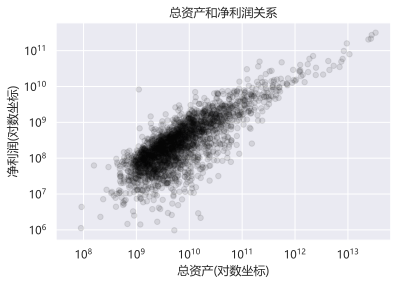

In [71]:
# logx和logy：采用对数坐标
# 当然，手动生成新的“对数总资产”列也是可以的。
# 使用黑白风格，便于打印
data.plot.scatter(x = '总资产', y = '净利润' ,logx = True,logy =True,c='black',alpha=0.1,s = 30);
plt.xlabel('总资产(对数坐标)')
plt.ylabel('净利润(对数坐标)')
plt.title('总资产和净利润关系');

### 分布图和密度图

用 `.plot.hist()`绘制分布，用`.plot.density()`绘制密度。

In [72]:
data = df.query("统计截止日期.dt.year == 2020")
data['对数总资产'] = np.log(data['总资产'])
data['对数总负债'] = np.log(data['总负债'])
data[['对数总资产','对数总负债']].head()

/tmp/ipykernel_476/795033559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['对数总资产'] = np.log(data['总资产'])
/tmp/ipykernel_476/795033559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['对数总负债'] = np.log(data['总负债'])


,对数总资产,对数总负债
4,29.128077,29.043077
9,28.256519,28.049292
14,21.170233,18.485856
19,21.626827,20.850492
24,23.459888,22.750988


用`.plot.hist()`绘制分布：常用参数

1. `bins` = 分成多少段
2. `color` = 中心填充的颜色，本案中保持默认
3. `ec` = 柱状图的边缘颜色，本案设为'black'黑色，颜色的列表见前面。
4. `alpha` = 透明度：会重叠的图形常用。

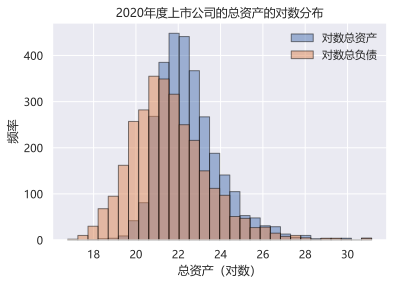

In [73]:
data[['对数总资产','对数总负债']].plot.hist(bins = 30,ec='black',alpha = 0.5);
plt.xlabel('总资产（对数）')
plt.ylabel('频率')
plt.title('2020年度上市公司的总资产的对数分布');
plt.legend(frameon=False); # 去掉图例的方框

用`.plot.density()`绘制概率密度，也是类似

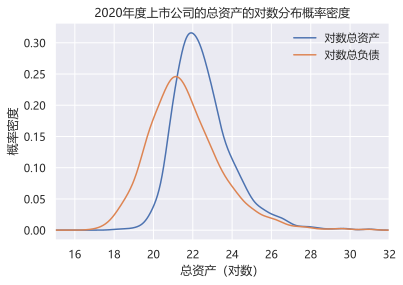

In [74]:
data[['对数总资产','对数总负债']].plot.density();
plt.xlabel('总资产（对数）')
plt.ylabel('概率密度')
plt.title('2020年度上市公司的总资产的对数分布概率密度');
plt.xlim((15,32)) # 限制一下范围
plt.legend(frameon=False); # 去掉图例的方框

### 条形图

绘制2020年前5大公司的规模。

In [75]:
top5_com = df.query('统计截止日期.dt.year == 2020').sort_values('总资产',ascending=False).head(5)
top5_com.iloc[:3,:3]

,证券代码,证券简称,统计截止日期
11384,601398,工商银行,2020-12-31
11701,601939,建设银行,2020-12-31
11306,601288,农业银行,2020-12-31


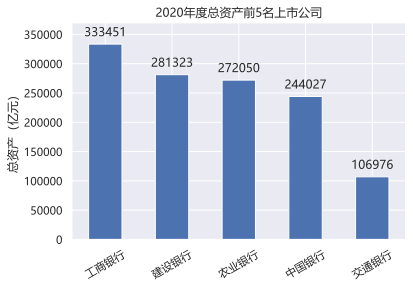

In [76]:
top5_com['总资产_亿'] = round(top5_com['总资产'] / 100000000,2)

# 为了添加数字，这里要把绘图保存到一个变量中
p = top5_com.plot.bar(x = '证券简称',y = '总资产_亿');

plt.xlabel('') # 去掉行标签

plt.ylabel('总资产（亿元）')
plt.title('2020年度总资产前5名上市公司')
plt.legend('',frameon=False) # 去掉图例

# 添加柱顶部数字，这里的p是前面保存的绘图变量，padding是间距。
plt.bar_label(p.containers[0], padding=5);

# 为了留出显示数字的空间，把y轴的上限提高一点
plt.ylim((0,370000))

# 旋转x轴刻度的字体，比如转30度
plt.xticks(rotation=30); 


用`.plot.barh()`可以绘制横向的柱状图（注意，函数名多了个`h`）

绘图的其他部分这里就略过了。

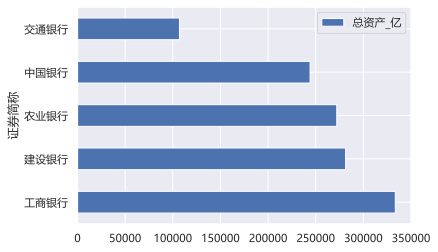

In [77]:
# 用plot.barh()绘制横向柱状图。
top5_com.plot.barh(x = '证券简称',y = '总资产_亿');

### 饼图

绘制总资产前5大上市公司对对比

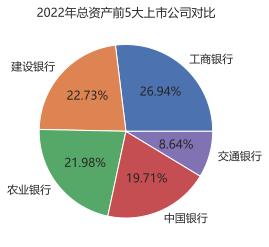

In [78]:
top5_com.set_index('证券简称')['总资产_亿'].plot.pie(autopct='%.2f%%');
plt.ylabel('')
plt.title('2022年总资产前5大上市公司对比');

## 时间序列专题

完整的api参考，见 [官方网站: matplotlib.dates](https://matplotlib.org/stable/api/dates_api.html)

### 简单示例

例如：要在图上绘制万科A的总资产和总负债的变化。

显然，我们需要的是一个时间序列数据：用`set_index()`把日期变成index


In [79]:
data = df.query('证券简称 == "万科A"').set_index('统计截止日期')[['总资产','总负债']]
data.head()

,总资产,总负债
统计截止日期,,
2016-12-31,8.306742e+11,6.689976e+11
2017-12-31,1.165347e+12,9.786730e+11
2018-12-31,1.528579e+12,1.292959e+12
2019-12-31,1.729929e+12,1.459350e+12
2020-12-31,1.869177e+12,1.519333e+12


In [80]:
# 转为亿元
data = round(data/100000000,2)
data

,总资产,总负债
统计截止日期,,
2016-12-31,8306.74,6689.98
2017-12-31,11653.47,9786.73
2018-12-31,15285.79,12929.59
2019-12-31,17299.29,14593.50
2020-12-31,18691.77,15193.33


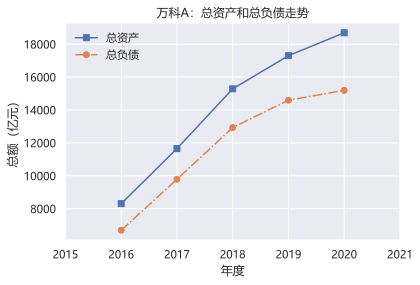

In [81]:
data.plot(style=['s-','o-.']); 

plt.xlim(('2015','2021'))
plt.xlabel('年度')
plt.ylabel('总额（亿元）')
plt.title('万科A：总资产和总负债走势')
plt.legend(frameon=False); # 去掉图例的方框

### 格式化日期与设定刻度


先创造一个示例数据：两个随机游走变量x和y，时间跨度是'2020-01-01'到'2021-06-30'：

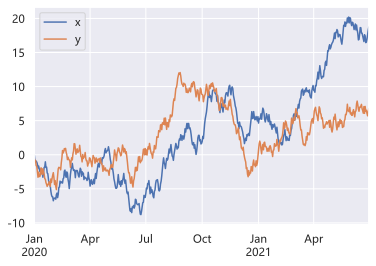

In [82]:
np.random.seed(2)

date = pd.date_range('2020-01-01','2021-06-30')

x = (np.random.uniform(-1,1.1,len(date))).cumsum()
y = (np.random.uniform(-1,1.1,len(date))).cumsum()

tmp_df = pd.DataFrame({'x':x,'y':y}, index= date)
ax = tmp_df.plot();

> **格式化日期**

1. 使用`DateFormatter()`函数，参数为一种日期的格式化返回格式化器formatter。如本例中使用ISO日期格式`%Y-%m-%d`。
2. 使用`ax.xaxis.set_major_formatter()`，对某个坐标系的x轴进行设定格式。参数是一个formatter。



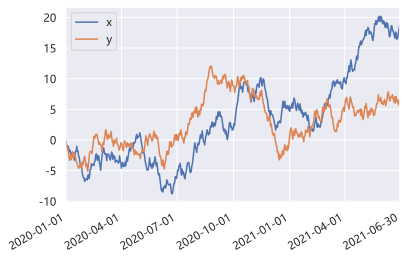

In [83]:
from matplotlib.dates import DateFormatter

# 绘图，并获得这张图的坐标系ax
ax = tmp_df.plot();

# 构造一个日期格式化工具，
iso_formatter = DateFormatter("%Y-%m-%d")

# 设定设定坐标系ax的x轴的日期格式
ax.xaxis.set_major_formatter(iso_formatter)

fig = plt.gcf() # 获得图形对象（画布）

fig.autofmt_xdate() # 自动设定x轴的样式，包括自动旋转、平移等等

多子图的情况也是类似（详见下一节）。`plt.subplots()`返回`fig, axes`，针对axes中的某个ax进行修改即可。

> **设定刻度（ticks）**


1. 一个坐标系`ax`都有2个轴：x轴（`ax.xaxis`）和y轴（`ax.yaxis`）
2. 每个轴都有2种刻度：主刻度`major_ticks`和辅刻度`minor_ticks`（同时也是网格的坐标）
3. 刻度可以由`Locator`修改：时间序列常用的刻度有`YearLocator`（年刻度），`MonthLocator`（月刻度），`DayLocator`（日刻度）等等，详见 [官网](https://matplotlib.org/stable/api/dates_api.html)

本案以月刻度为例，用 `MonthLocator()`创建一个月度的刻度：

常用参数：

1. `bymonth=`：（第一个参数）指定月份的tuple。如只在1月和7月显示刻度 `MonthLocator((1,7))`
2. `interval=`：间隔。如隔一个月画一个刻度 `MonthLocator(interval=2)`
3. `bymonthday=`：刻度画在月份的第几天。（默认）1表示第一天，-1表示最后一天，如此类推。

那么回到本案：

1. 日期是ISO格式：`DateFormatter("%Y-%m-%d")`
2. 每2个月画一个刻度，并在画在每月1日：`MonthLocator(interval=2)`


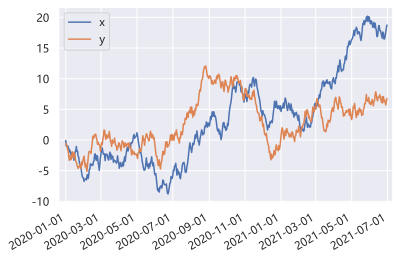

In [84]:
from matplotlib.dates import DateFormatter
from matplotlib.dates import MonthLocator, YearLocator
# 绘图，并获得这张图的坐标系ax
ax = tmp_df.plot();

ax.set_xlim(('2019-12-20','2021-07-10')) # 拓宽一点

# 构造一个日期格式化工具，
iso_formatter = DateFormatter("%Y-%m-%d")

# 设定设定坐标系ax的x轴的日期格式
ax.xaxis.set_major_formatter(iso_formatter)

mloc = MonthLocator(interval=2) # 每2个月画一个刻度

ax.xaxis.set_major_locator(mloc)

fig = plt.gcf() # 获得图形对象（画布）

fig.autofmt_xdate() # 自动设定x轴的样式，包括自动旋转、平移等等

## 多图组合（待续）

In [85]:
df.head()

,证券代码,证券简称,统计截止日期,总资产,总负债,净资产,净利润,营业总收入,资产负债率
0,000001,平安银行,2016-12-31,2.953434e+12,2.751263e+12,2.021710e+11,2.259900e+10,1.044160e+11,0.9315
1,000001,平安银行,2017-12-31,3.248474e+12,3.026420e+12,2.220540e+11,2.318900e+10,1.048690e+11,0.9316
2,000001,平安银行,2018-12-31,3.418592e+12,3.178550e+12,2.400420e+11,2.481800e+10,1.062120e+11,0.9298
3,000001,平安银行,2019-12-31,3.939070e+12,3.626087e+12,3.129830e+11,2.819500e+10,1.268140e+11,0.9205
4,000001,平安银行,2020-12-31,4.468514e+12,4.104383e+12,3.641310e+11,2.892800e+10,1.432420e+11,0.9185


### 简单示例

绘图的目标：例如，我们要绘制平安银行的资产、负债和资产负债率。

要考虑的问题：

1. 资产和负债基本在一个数量级，可以绘在同一张图。
2. 资产负债率是一个很小的整数，没法和前两者绘制在一起（你可以尝试一下）。
3. 三者的时间跨度完全相同，因此横轴（时间）完全一样。


这也是时间序列分析常见的情况：把同一时段的不同数据放在一起对比。

因此可以考虑：

1. 因为横轴相同，因此绘制上下两张图。
2. 上图是资产和负债，尺度相同可以绘制在一起。
3. 下图是资产负债率。
4. 因为共用横轴，那么上图的横轴时间就可以去除。

使用函数`plt.subplots(2, 1) `，会创建一片画布，以及上下2个空白的坐标系（子图的绘制区域）

会返回一个2个元素的元组`(fig, axes)`

1. `fig`：一个Figure（图片）对象，可以理解为一整块“画布”。
2. `axes`：一个axes（坐标系）的List。每个子图的区域，都可以认为是有其自己的坐标系。

我们绘制子图，实际上是把一个单独的图形绘制画布的某个区域的坐标系上。

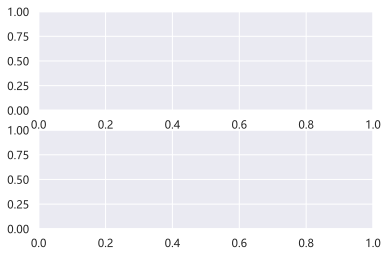

In [86]:
# 设置绘图区域（画布）
fig, axes = plt.subplots(2, 1) # 1片画布（白色底部），2个坐标轴（子图）

显而易见，`axes`就是一个2个元素的列表，分别表示2个坐标系。

In [87]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

在绘图的时候，我们可以用`df.plot.xxx(ax=)`的参数`ax`，指定我们要把这个图形绘制在哪个坐标系上。

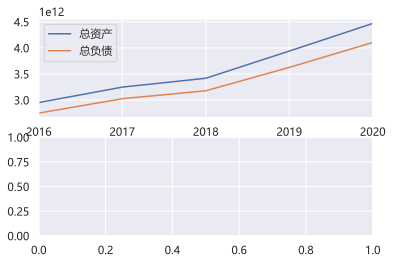

In [88]:
# 构造示例数据：选择平安银行
data = df.query('证券简称 == "平安银行"')
data.set_index('统计截止日期',inplace = True)

# 设置图形和2个坐标系
fig, axes = plt.subplots(2, 1) # 行，列

# 绘制总资产和总负债，并指定绘制在第一个坐标系上
data[['总资产','总负债']].plot(ax = axes[0]);


同理，我们可以把资产负债率设置在第二个坐标系上。

几个常用设定：

1. 设置子图的行列标签、标题： `axes[?].set(xlabel = ?,ylabel = ?, title = ?)`

本例去掉了所有子图的行标签，第一个子图有标题。

2. 共用坐标轴：`plt.subplots(sharex = ?, sharey = ?)`

因为时间区间是一样的，那么2个子图的横坐标也完全相同，那么可以共用横轴。

3. 子图间距：`plt.subplots_adjust(wspace = ?,hspace = ?)`

这里稍微缩小一下间距，让2个子图靠近一点。

子图的`set()`函数可以调整的东西很多，不能一一列举，具体见官网链接 [matplotlib.axes.Axes.set](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html)。

同理，我们可以把资产负债率设置在第二个坐标系上。

几个常用设定：

1. 设置子图的行列标签、标题： `axes[?].set(xlabel = ?,ylabel = ?, title = ?)`

本例去掉了所有子图的行标签，第一个子图有标题。

2. 共用坐标轴：`plt.subplots(sharex = ?, sharey = ?)`

因为时间区间是一样的，那么2个子图的横坐标也完全相同，那么可以共用横轴。

3. 子图间距：`plt.subplots_adjust(wspace = ?,hspace = ?)`

这里稍微缩小一下间距，让2个子图靠近一点。

子图的`set()`函数可以调整的东西很多，不能一一列举，具体见官网链接 [matplotlib.axes.Axes.set](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html)。

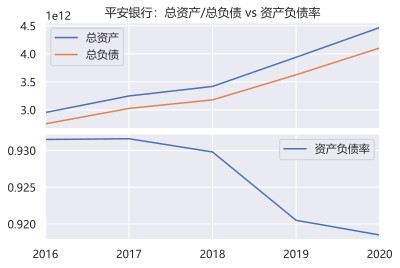

In [89]:
# 设置图形和2个坐标系
fig, axes = plt.subplots(2, 1, sharex = True) 

# 绘制总资产和总负债，并指定绘制在第1个坐标系上
data[['总资产','总负债']].plot(ax = axes[0]);
axes[0].set(xlabel='',title = '平安银行：总资产/总负债 vs 资产负债率')

# 资产负债率，绘制在第2个坐标系上
data[['资产负债率']].plot(ax=axes[1]) # 绘制第2格
axes[1].set(xlabel='')

# 压缩一下子图之间的空白
plt.subplots_adjust(wspace=0.05,hspace=0.05)

横向排列类似，只要1行多列即可，如`fig, axes = plt.subplots(1, 2) `。此处略过。

### 多行多列

多行多列稍有不同，此时`axes`是一个二维数组，第一个下标是行，第二个下标是列。

例如`axes[0,0]`表示第1行第1列的子图，`axes[0,1]`表示第1行第2列的子图，如此类推。

其他：

1. `fig.suptitle()`多子图的总标题：这个总标题是绘制在子图之外，画布的顶端，因此是`fig`（画布）的元素。

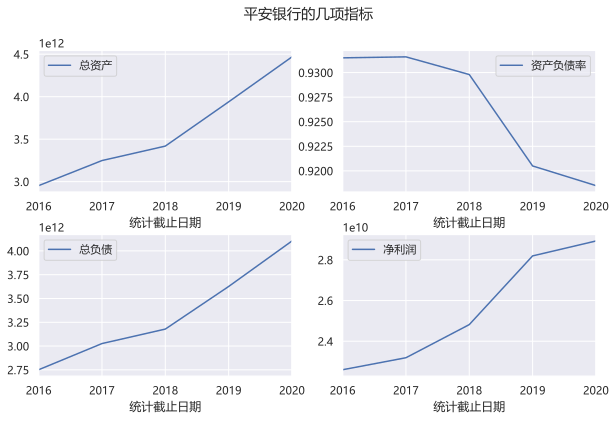

In [90]:
fig, axes = plt.subplots(2, 2,figsize = (10,6)) 

fig.suptitle('平安银行的几项指标')

data[['总资产']].plot(ax = axes[0,0]);

data[['总负债']].plot(ax=axes[1,0])

data[['资产负债率']].plot(ax=axes[0,1])

data[['净利润']].plot(ax=axes[1,1])

plt.subplots_adjust(wspace=0.2,hspace=0.3) # 拓宽一点行列空白

### Seaborn的结构化子图（TODO）


## 主题、色彩与风格（TODO）


### 选择主题

### 选择调色板

### 细节与微调微调

